# Predicting the Concrete Strength 
### Concrete Compressive Strength
#### Problem Statement
* This is a dataset containing the different factors that can affect the compressive strength of concrete. The target is to use those factors to predict the compressive strength of the concrete.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('concrete.csv')
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## EDA

<AxesSubplot:xlabel='strength', ylabel='Density'>

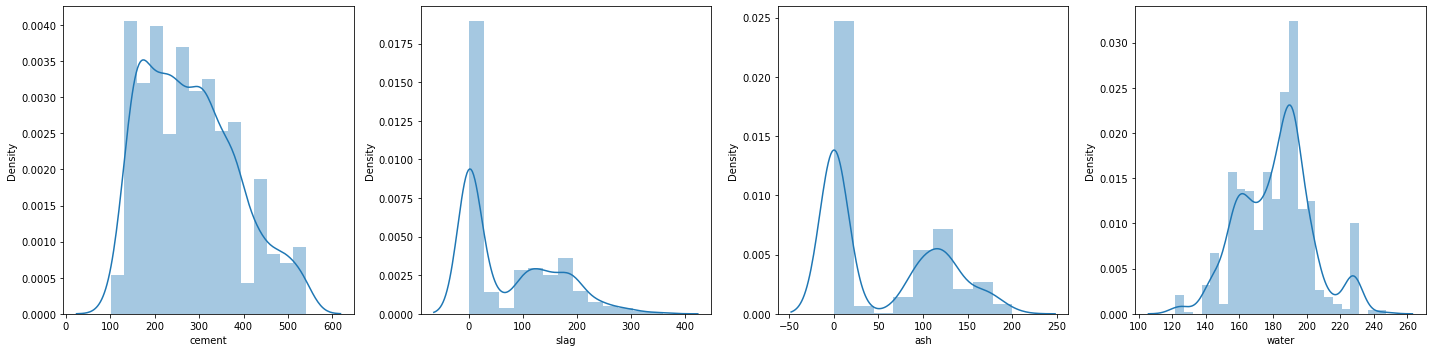

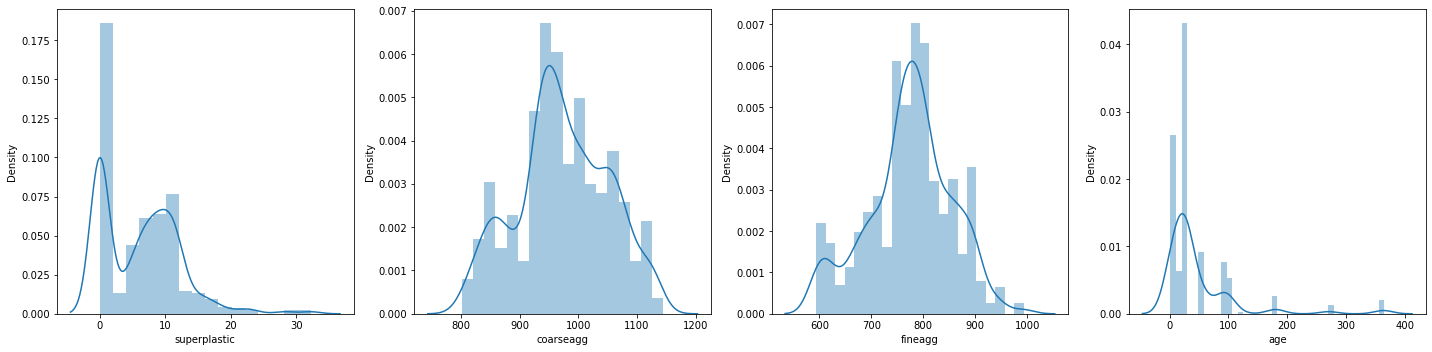

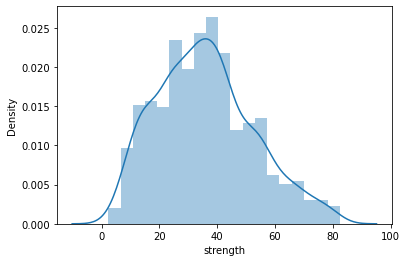

In [3]:
fig, ax = plt.subplots(1,4, figsize = (20,5))
sns.distplot(data.cement, ax = ax[0])
sns.distplot(data.slag, ax = ax[1])
sns.distplot(data.ash, ax = ax[2])
sns.distplot(data.water, ax = ax[3])
plt.tight_layout()
fig, ax = plt.subplots(1,4, figsize = (20,5))
sns.distplot(data.superplastic, ax = ax[0])
sns.distplot(data.coarseagg, ax = ax[1])
sns.distplot(data.fineagg, ax = ax[2])
sns.distplot(data.age, ax = ax[3])
plt.tight_layout()
fig, ax = plt.subplots(1)
sns.distplot(data.strength)

<AxesSubplot:xlabel='strength'>

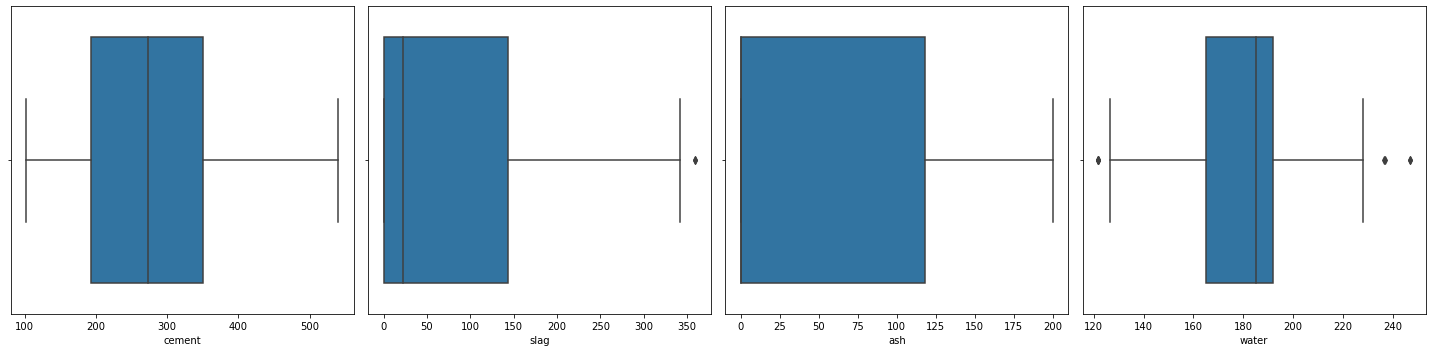

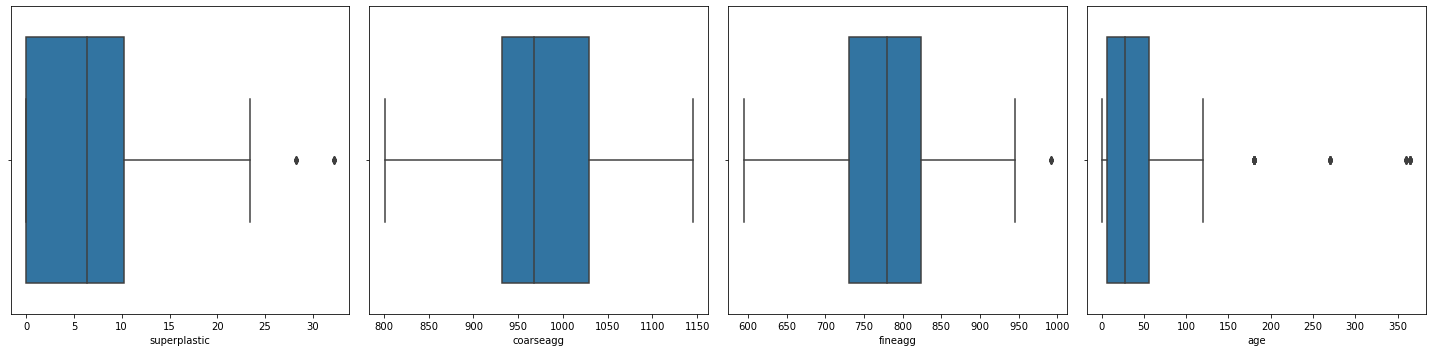

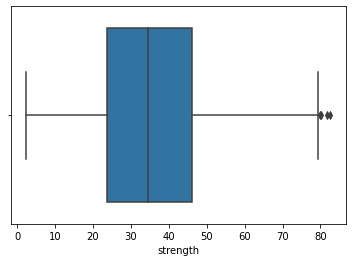

In [4]:
fig, ax = plt.subplots(1,4, figsize = (20,5))
sns.boxplot(data.cement, ax = ax[0])
sns.boxplot(data.slag, ax = ax[1])
sns.boxplot(data.ash, ax = ax[2])
sns.boxplot(data.water, ax = ax[3])
plt.tight_layout()
fig, ax = plt.subplots(1,4, figsize = (20,5))
sns.boxplot(data.superplastic, ax = ax[0])
sns.boxplot(data.coarseagg, ax = ax[1])
sns.boxplot(data.fineagg, ax = ax[2])
sns.boxplot(data.age, ax = ax[3])
plt.tight_layout()
fig, ax = plt.subplots(1)
sns.boxplot(data.strength)

#### There are minimal outliers in the data, and is evident in the age. We will try to remove them if the model's accuracy does not improve

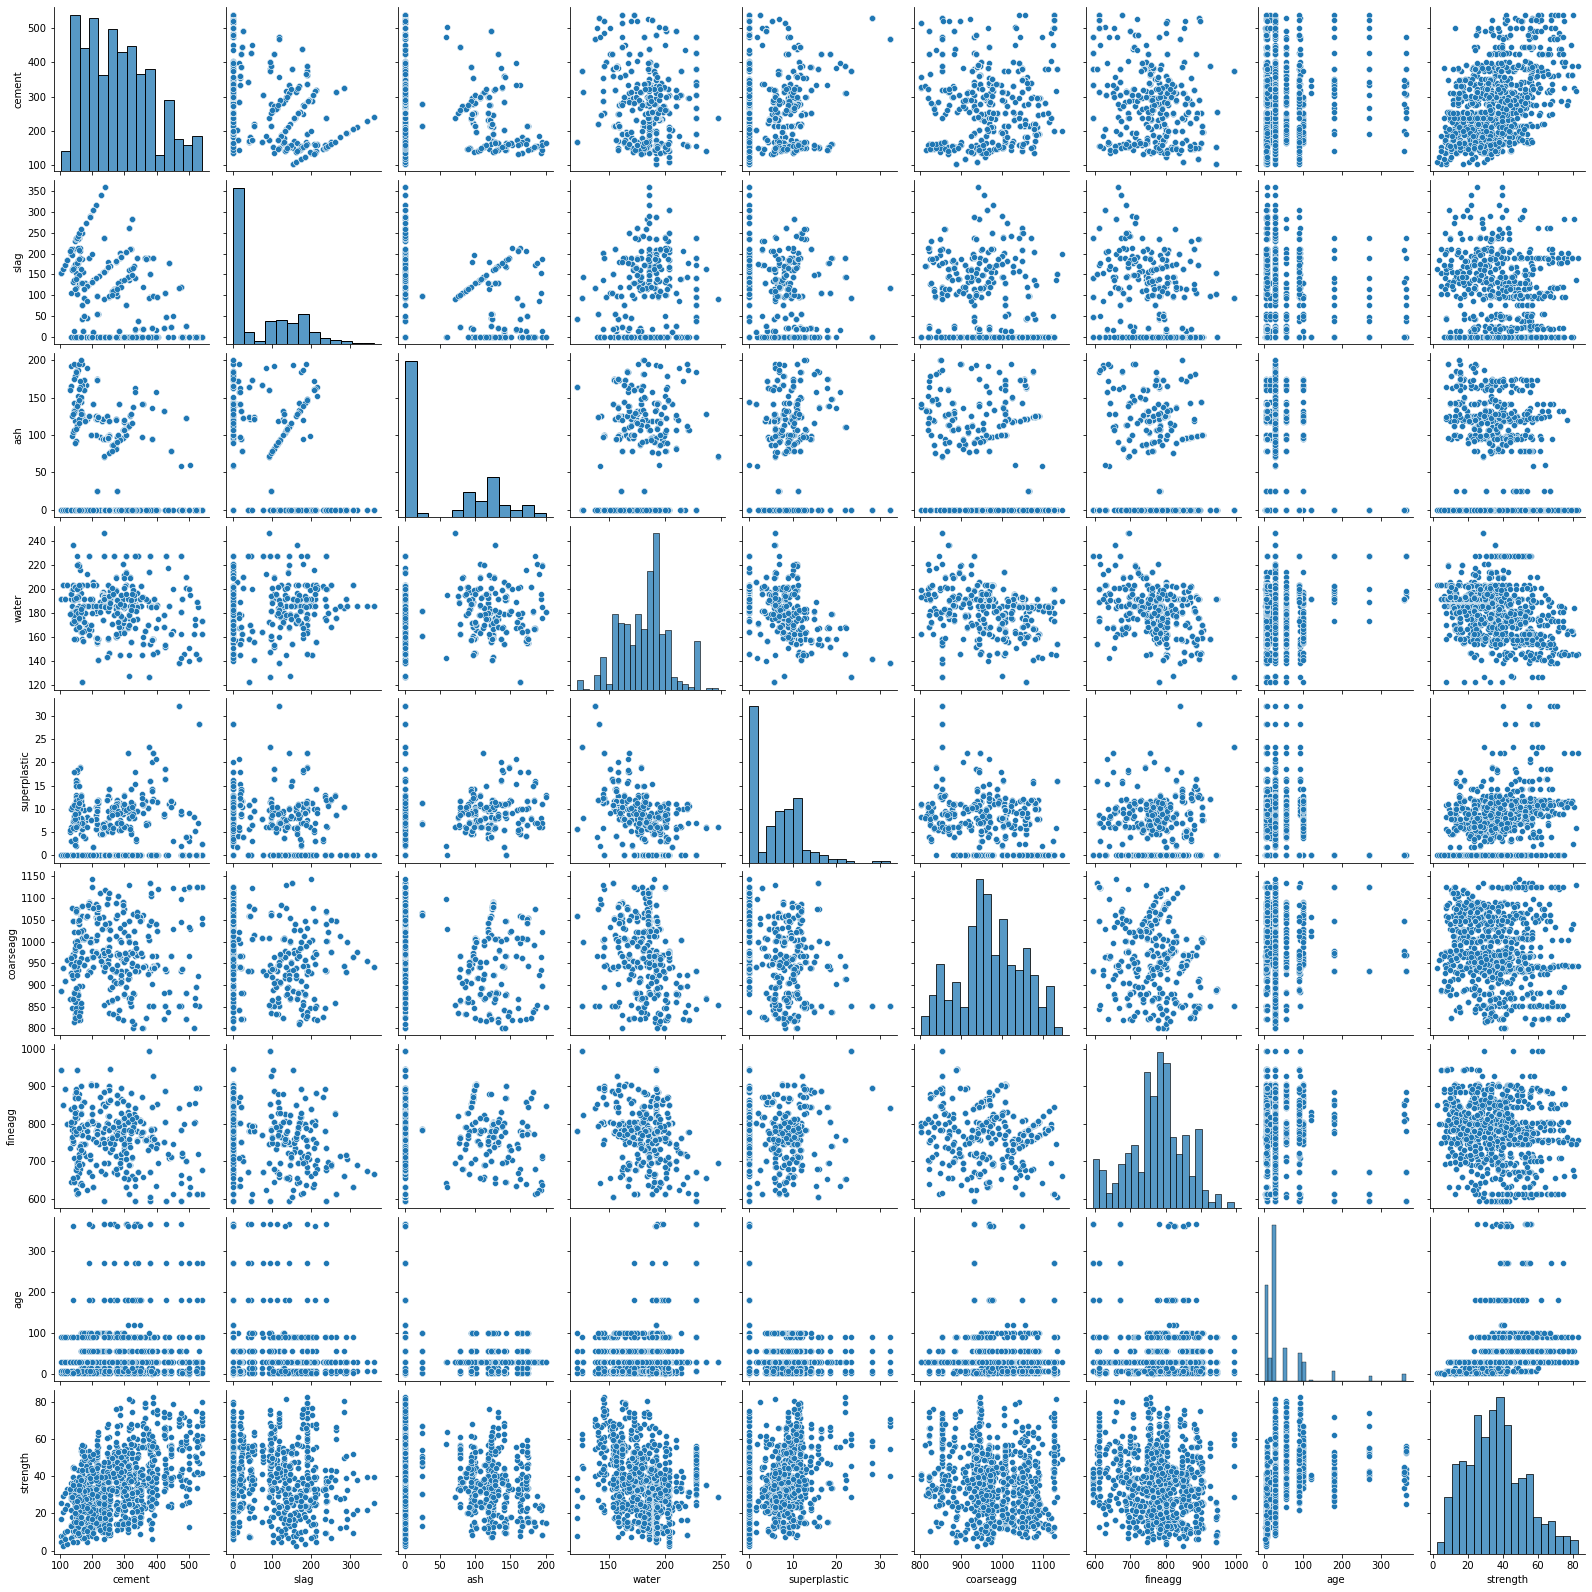

In [5]:
sns.pairplot(data =data)

<AxesSubplot:>

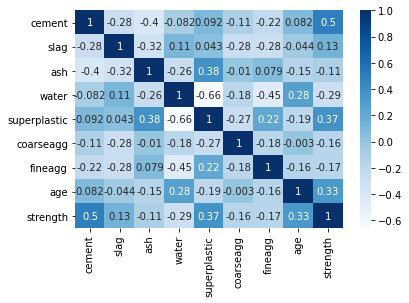

In [6]:
sns.heatmap(data= data.corr(), cmap = 'Blues',annot= True )

#### As for the heatmap, cement, slag, superplastic, and age have a direct correlation towards the strength, while ash, water, coarseagg, and fineagg have inverse relationship against strength

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

#### Scaling the features using MinMaxScaler to preserve the distribution of the variables, since there are minimal outliers

## Machine Learning

#### Trying not to remove any features using our base models

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

In [9]:
regressions = [('Linear', LinearRegression()),
              ('Ridge', Ridge()),
              ('Lasso', Lasso()),
              ('Gaussian', GaussianProcessRegressor()),
              ('SVM', SVR()),
              ('RandomForest', RandomForestRegressor()),
               ('XGB', XGBRegressor())
              ]

In [10]:
def base_models(x, y):
    for name, regression in regressions:
        regression.fit(X_train_scaled, y_train)
        pred_train = regression.predict(X_train_scaled)
        pred_test = regression.predict(X_test_scaled)
        print({name})
        print("Train R2:", r2_score(y_train, pred_train))
        print("Train MSE:", mean_squared_error(y_train, pred_train))
        print("-------------------------")
        print("Test R2:", r2_score(y_test, pred_test))
        print("Test MSE:", mean_squared_error(y_test, pred_test), end="\n\n")
        

In [28]:
base_models(x,y)

{'Linear'}
Train R2: 0.6091237370441138
Train MSE: 110.33204398799992
-------------------------
Test R2: 0.6369606518338298
Test MSE: 95.61717380589968

{'Ridge'}
Train R2: 0.6061938568365772
Train MSE: 111.15905678609859
-------------------------
Test R2: 0.6369724381785957
Test MSE: 95.61406952262648

{'Lasso'}
Train R2: 0.183387351584952
Train MSE: 230.50400135516696
-------------------------
Test R2: 0.22686412410750967
Test MSE: 203.62825075080227

{'Gaussian'}
Train R2: 0.9923142035582763
Train MSE: 2.169457988260555
-------------------------
Test R2: -12.154257387890766
Test MSE: 3464.5636108011736

{'SVM'}
Train R2: 0.6277343380891627
Train MSE: 105.07885813931823
-------------------------
Test R2: 0.6200441908217149
Test MSE: 100.0726252630121

{'RandomForest'}
Train R2: 0.9842455432998226
Train MSE: 4.4469863595865915
-------------------------
Test R2: 0.9170994510229533
Test MSE: 21.834316969174818

{'XGB'}
Train R2: 0.9947870188511434
Train MSE: 1.4714602034792164
---------

In [44]:
linear_params = { }
lasso_params = {'alpha':[0.02, 0.024, 0.028, 0.032]}
ridge_params = {'alpha':[ 230, 250, 270, 300,500]}
gaus_params = {'alpha':  [1e-10, 1e-20]}
rf_params  ={'max_depth':[5,7,10],
              'n_estimators':[100,200,500],
              
               'min_samples_leaf':[1,3,6],
                'min_samples_split':[1,3,6]}
xgb_params = {'learning_rate': [0.01, 0.1],
              'max_depth': [3,5,7],
              'min_child_weight': [1, 3,5],
              'subsample': [0.7, 1],
              'colsample_bytree': [0.7,1],
              'n_estimators' : [100,200,500],
              'objective': ['reg:squarederror'],
              'booster':['gbtree'],
              'alpha':[0.02, 0.024, 0.028, 0.032]}
svm_params = {'kernel': ['linear','poly'], 
              'C':[1.5, 10],
              'gamma': [1e-7, 1e-4]}
regressions = [('Linear', LinearRegression(), linear_params),
              ('Ridge', Ridge(), ridge_params),
              ('Lasso', Lasso(), lasso_params),
              ('Gaussian', GaussianProcessRegressor(),gaus_params),
              ('SVM', SVR(),svm_params),
              ('RandomForest', RandomForestRegressor(), rf_params),
               ('XGB', XGBRegressor(), xgb_params)
              ]

In [49]:
def tuned_models(x,y):
    for name, regression, params in regressions:
        print({name})
        regression.fit(X_train_scaled, y_train)
        pred_train = regression.predict(X_train_scaled)
        pred_test = regression.predict(X_test_scaled)
        
        print("Train R2:", r2_score(y_train, pred_train), "{Before}")
        print("Train MSE:", mean_squared_error(y_train, pred_train), "{Before}")
        print("-------------------------")
        print("Test R2:", r2_score(y_test, pred_test), "{Before}")
        print("Test MSE:", mean_squared_error(y_test, pred_test), "{Before}", end="\n\n")
        gs_tuned = GridSearchCV(regression,params, verbose = False).fit(X_train_scaled, y_train)
        tuned_final = regression.set_params(**gs_tuned.best_params_)
        
        tuned_final.fit(X_train_scaled, y_train)
        pred_train = tuned_final.predict(X_train_scaled)
        pred_test = tuned_final.predict(X_test_scaled)
        print({name})
        print("Train R2:", r2_score(y_train, pred_train), "{After}")
        print("Train MSE:", mean_squared_error(y_train, pred_train), "{After}")
        print("-------------------------")
        print("Test R2:", r2_score(y_test, pred_test), "{After}")
        print("Test MSE:", mean_squared_error(y_test, pred_test), "{After}")
        print(f"{name} best params: {gs_tuned.best_params_}", end="\n\n")

In [48]:
tuned_models(x,y)

{'Linear'}
{'Linear'}
Train R2: 0.6091237370441138 {Before}
Train MSE: 110.33204398799992 {Before}
-------------------------
Test R2: 0.6369606518338298 {Before}
Test MSE: 95.61717380589968 {Before}

{'Linear'}
Train R2: 0.6091237370441138 {After}
Train MSE: 110.33204398799992 {After}
-------------------------
Test R2: 0.6369606518338298 {After}
Test MSE: 95.61717380589968 {After}
Linear best params: {}

{'Ridge'}
{'Ridge'}
Train R2: 0.15461800786581037 {Before}
Train MSE: 238.62467993698317 {Before}
-------------------------
Test R2: 0.15738087823644165 {Before}
Test MSE: 221.92872322193227 {Before}

{'Ridge'}
Train R2: 0.15461800786581037 {After}
Train MSE: 238.62467993698317 {After}
-------------------------
Test R2: 0.15738087823644165 {After}
Test MSE: 221.92872322193227 {After}
Ridge best params: {'alpha': 230}

{'Lasso'}
{'Lasso'}
Train R2: 0.6070471047901149 {Before}
Train MSE: 110.91821179328558 {Before}
-------------------------
Test R2: 0.6387268537235532 {Before}
Test MSE: 

### Trying Polynomial Regression since Linear Regression did not perform well, and some of the variables have different (direct and inverse) relationship with the target Y

In [57]:
for i in range(1,6):
    poly_transform = PolynomialFeatures(degree = i, include_bias= True)
    X_train_scaled_transform = poly_transform.fit_transform(X_train_scaled)
    X_test_scaled_transform = poly_transform.transform(X_test_scaled)
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled_transform,y_train)
    print('Coeff:', i)
    print('Linear')
    print('Train R2score:',r2_score(y_train,lr_model.predict(X_train_scaled_transform)))
    print('Test R2score:',r2_score(y_test,lr_model.predict(X_test_scaled_transform)), end = '\n\n')
    

Coeff: 1
Linear
Train R2score: 0.6091237370441138
Test R2score: 0.6369606518338299

Coeff: 2
Linear
Train R2score: 0.8164466687340985
Test R2score: 0.7634884752131036

Coeff: 3
Linear
Train R2score: 0.9321177548698043
Test R2score: 0.8058981526082794

Coeff: 4
Linear
Train R2score: 0.9538840407014637
Test R2score: -8.753164746473617

Coeff: 5
Linear
Train R2score: 0.9925239536977375
Test R2score: -1.6539609900499444e+16



#### Seeing the results, the best coefficient to use is 2. A coefficient of 3 would make an overfit

### Using Feature Selection/Importance to eliminate certain features and eliminate the risk of overfitting the models that performed well

In [82]:
rf_model = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=3,
                                 n_estimators = 500, random_state = 0)
rfe = RFE(rf_model, n_features_to_select=4)
rfe.fit(X_train_scaled, y_train)
print("Feature Ranking: %s" % (rfe.ranking_))
print('cement','slag','ash','water','superplastic','coarseagg','fineagg','age')


Feature Ranking: [1 2 5 1 1 4 3 1]
cement slag ash water superplastic coarseagg fineagg age


[0.28917556 0.07326056 0.01975427 0.10344659 0.10103958 0.02776098
 0.03971795 0.34584451]


<BarContainer object of 8 artists>

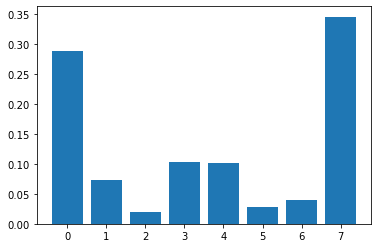

In [66]:
rf_model.fit(X_train_scaled, y_train)
print(rf_model.feature_importances_)
plt.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)

#### Based on the Feature Selection/Importance, the best features are cement, superplastc, coarseagg, and age

### Considering the models that performed well which are XGB and RF Regressor, we will use the selected features to fit the model again

In [95]:
X_train_selected = X_train[['cement', 'superplastic', 'coarseagg', 'age']]
X_test_selected = X_test[['cement', 'superplastic', 'coarseagg', 'age']]
regressions = [('RF', RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=3,
                                 n_estimators = 500, random_state = 0)),
              ('XGB', XGBRegressor(alpha= 0.024, booster= 'gbtree', colsample_bytree= 1, learning_rate= 0.1, 
                                   max_depth= 5, min_child_weight= 1,
                                   n_estimators=500,objective= 'reg:squarederror', subsample= 0.7))]
def best_models_with_select_features(X,y):
    for name, regression in regressions:
        print({name})
        regression.fit(X_train_selected, y_train)
        pred_train = regression.predict(X_train_selected)
        pred_test = regression.predict(X_test_selected)
        
        print("Train R2:", r2_score(y_train, pred_train))
        print("Train MSE:", mean_squared_error(y_train, pred_train))
        print("-------------------------")
        print("Test R2:", r2_score(y_test, pred_test))
        print("Test MSE:", mean_squared_error(y_test, pred_test), end="\n\n")
        

In [96]:
best_models_with_select_features(x,y)

{'RF'}
Train R2: 0.9524746800866902
Train MSE: 13.41489925114959
-------------------------
Test R2: 0.8759861232844579
Test MSE: 32.662730539131054

{'XGB'}
Train R2: 0.9886600990022245
Train MSE: 3.2008964838249487
-------------------------
Test R2: 0.921569466456937
Test MSE: 20.65700590131049



### Random Forest Regressor (Predicted vs Actual) Graph

In [97]:
rf_model = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=3,
                                 n_estimators = 500, random_state = 0)
rf_model.fit(X_train_selected, y_train)
pred_test_rf = rf_model.predict(X_test_selected)
xgb_model = XGBRegressor(alpha= 0.024, booster= 'gbtree', colsample_bytree= 1, learning_rate= 0.1, 
                                   max_depth= 5, min_child_weight= 1,
                                   n_estimators=500,objective= 'reg:squarederror', subsample= 0.7)
xgb_model.fit(X_train_selected, y_train)
pred_test_xgb = xgb_model.predict(X_test_selected)

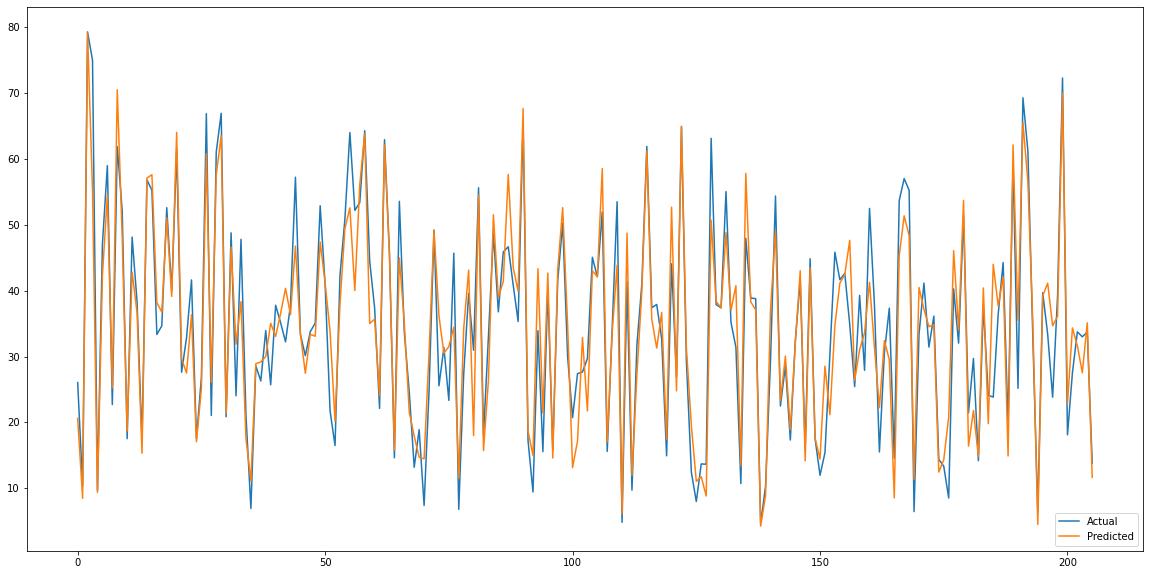

In [99]:
fig, ax = plt.subplots(figsize = (20,10))
plt.plot(y_test.values, label = "Actual")
plt.plot(pred_test_rf, label = "Predicted")
plt.legend(loc = 'lower right')

### XGB Regressor (Predicted vs Actual) Graph

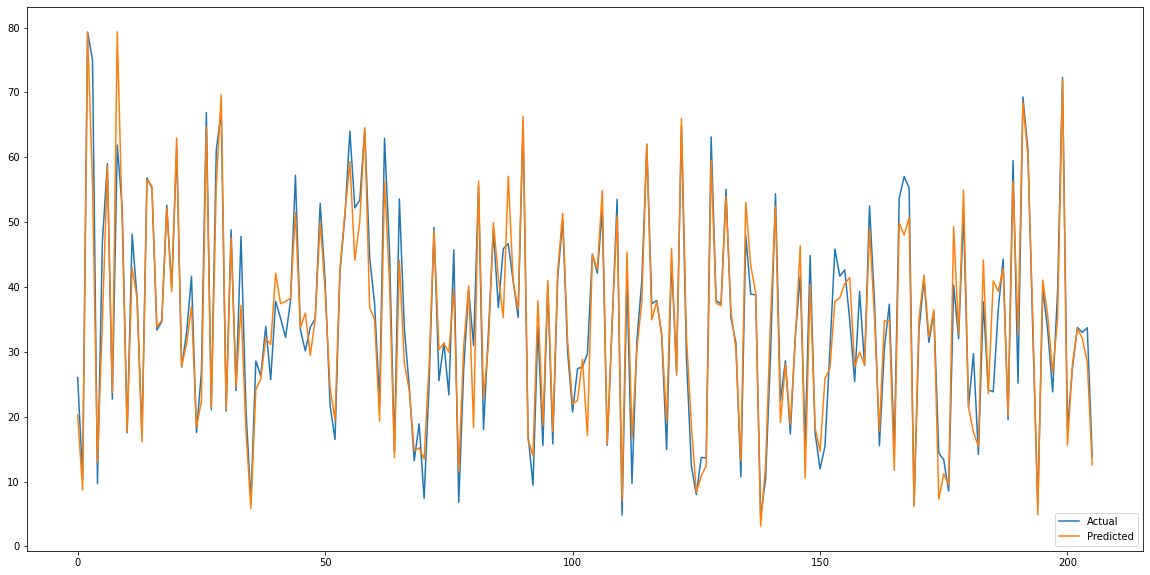

In [100]:
fig, ax = plt.subplots(figsize = (20,10))
plt.plot(y_test.values, label = "Actual")
plt.plot(pred_test_xgb, label = "Predicted")
plt.legend(loc = 'lower right')